<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.3: Stacking

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read data in pandas

location = r"D:\Download\DataScience\Files\Week061123_DecisionTree_Ensemble\Module 7\breast-cancer-wisconsin-data.csv"
df = pd.read_csv(location)

# Check data has loaded correctly
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
# Perform EDA by investigating each of the points above 

# Number of features:
df.shape

(569, 33)

In [5]:
# Data types:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
# Domains and intervals:
# Not sure if I understand this but if domain in this context means all possible values that the features can have, 
# and intervals meaning distributions of values within the domain then:

for col in df.columns:
    temp_df = df[col].value_counts()
    temp_df.columns = ['value', 'quantity']
    print(f"Counts for {col}:\n{temp_df}\n")

Counts for id:
842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: id, Length: 569, dtype: int64

Counts for diagnosis:
B    357
M    212
Name: diagnosis, dtype: int64

Counts for radius_mean:
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64

Counts for texture_mean:
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: texture_mean, Length: 479, dtype: int64

Counts for perimeter_mean:
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64

Counts for area_mean:
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1


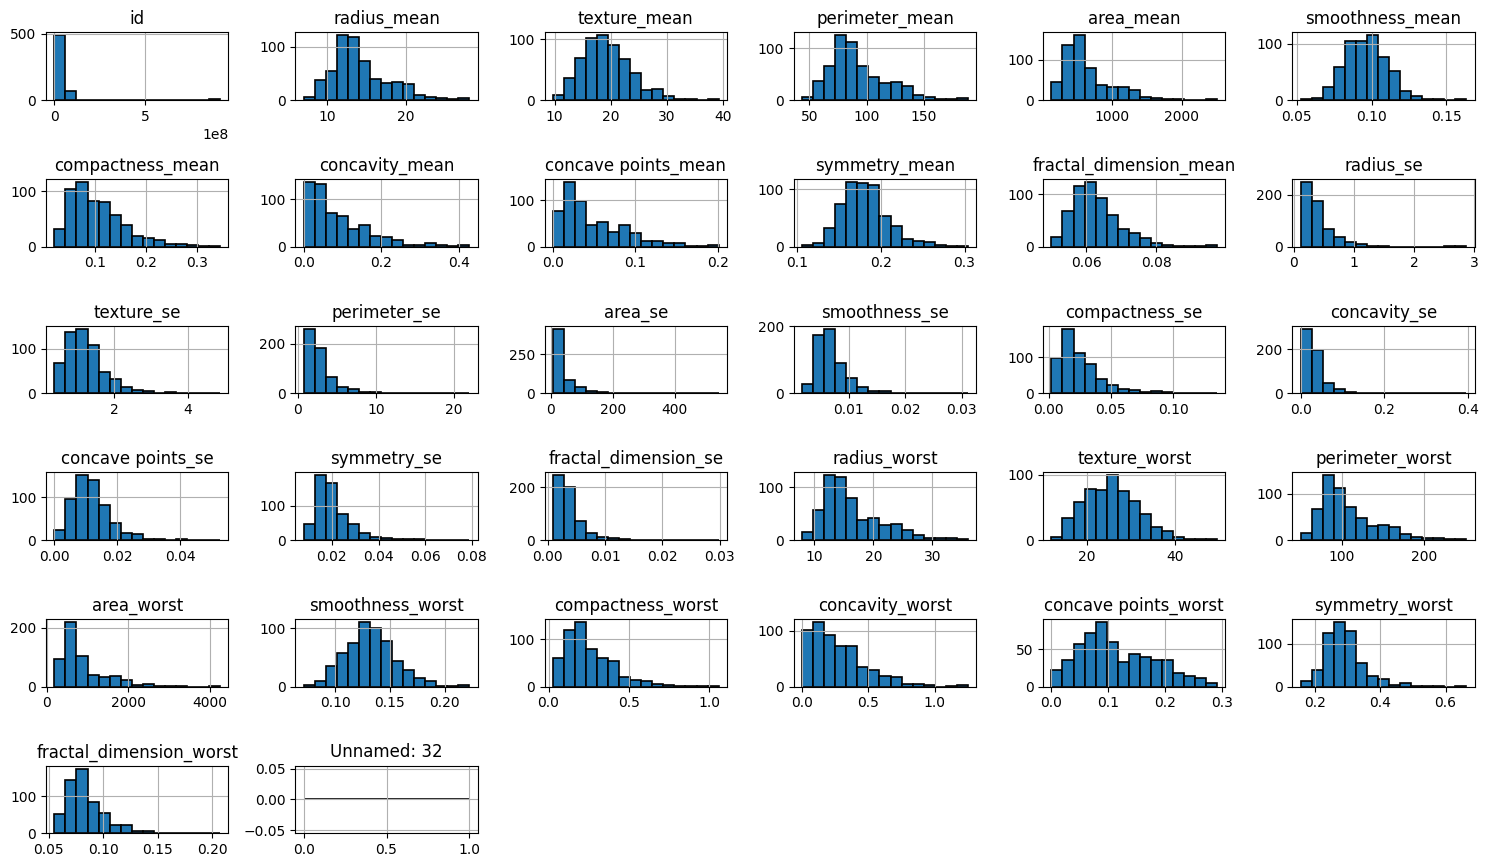

In [7]:
df.hist(bins=15, figsize=(15,10), layout=(7,6), edgecolor='black', linewidth=1.2)
plt.tight_layout()
plt.show()

In [8]:
# Also, modifying the dataframe should come on next step but on here, I need to change the 'diagnosis' column so I can do the outlier check
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1} )

D:\Program\Anaconda\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
D:\Program\Anaconda\Lib\site-packages\sklearn\preprocessing\_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


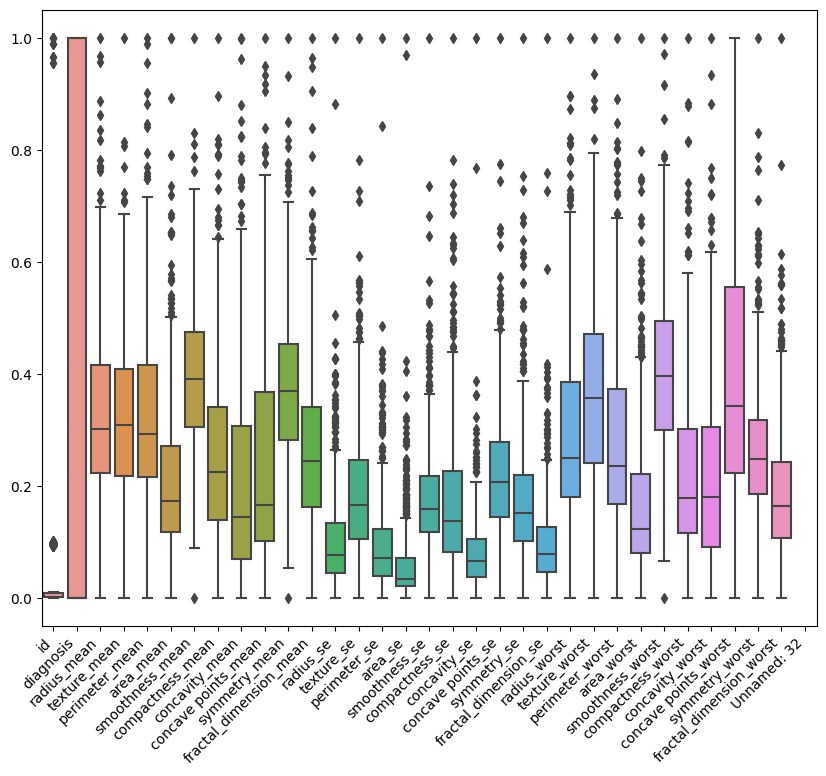

In [9]:
# Checking outliers now and scaling the dataframe so a more meaningful comparison can be drawn for each column

scaler = MinMaxScaler()
df_scaled_BP = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.figure(figsize = (10,8))
sns.boxplot(data=df_scaled_BP)
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [10]:
# Checking the amount of outliers as percentage of total data
for col in df.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine outliers using IQR
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))

    # Calculate the percentage of outliers
    outliers_percent = 100 * outliers.sum() / len(df)

    print(f"{col} has {outliers.sum()} outliers, which is {outliers_percent:.2f}% of the data")

id has 81 outliers, which is 14.24% of the data
diagnosis has 0 outliers, which is 0.00% of the data
radius_mean has 14 outliers, which is 2.46% of the data
texture_mean has 7 outliers, which is 1.23% of the data
perimeter_mean has 13 outliers, which is 2.28% of the data
area_mean has 25 outliers, which is 4.39% of the data
smoothness_mean has 6 outliers, which is 1.05% of the data
compactness_mean has 16 outliers, which is 2.81% of the data
concavity_mean has 18 outliers, which is 3.16% of the data
concave points_mean has 10 outliers, which is 1.76% of the data
symmetry_mean has 15 outliers, which is 2.64% of the data
fractal_dimension_mean has 15 outliers, which is 2.64% of the data
radius_se has 38 outliers, which is 6.68% of the data
texture_se has 20 outliers, which is 3.51% of the data
perimeter_se has 38 outliers, which is 6.68% of the data
area_se has 65 outliers, which is 11.42% of the data
smoothness_se has 30 outliers, which is 5.27% of the data
compactness_se has 28 outlier

In [11]:
# Checking null value
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# Checking coded content:
# Have already checked for every unique value on each column on the step for checking domain and interval
# Looks like the data doesn't have anything like that

# from value_counts() and dtypes, I don't seem to see any coded content here, but I've ticked off the rest of the EDA process

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [13]:
# Dropping Unnamed: 32 because it was messing up the for loop I have below for the outlier removal
df.drop(columns=['Unnamed: 32'], inplace=True)

In [14]:
# Also setting the id as the index
df.set_index('id')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [15]:
# Checking for any duplicate on the dataframe. Below it's saying the unique value on column id is also 569 which is the same as number of column
# That means each row should be unique and not a duplicate
df['id'].value_counts().sum()

569

In [16]:
# For outliers, the approach I will use is to store dataframe with and without outliers
# Then whichever gives higher accuracy will be used

df_no_outlier = df.copy()

for col in df_no_outlier.columns:
    # Excluding the target column from outlier removal because that would make all target as whatever is the majority
    if col!= 'diagnosis':    
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_no_outlier[col].quantile(0.25)
        Q3 = df_no_outlier[col].quantile(0.75)

        # Calculate Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Determine non-outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to keep only non-outliers
        df_no_outlier = df_no_outlier[(df_no_outlier[col] >= lower_bound) & (df_no_outlier[col] <= upper_bound)]

In [17]:
df_no_outlier

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
40,855167,1,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,15.93,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,923780,0,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,...,12.02,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
552,924084,0,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,...,13.87,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
554,924632,0,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242
555,924934,0,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283


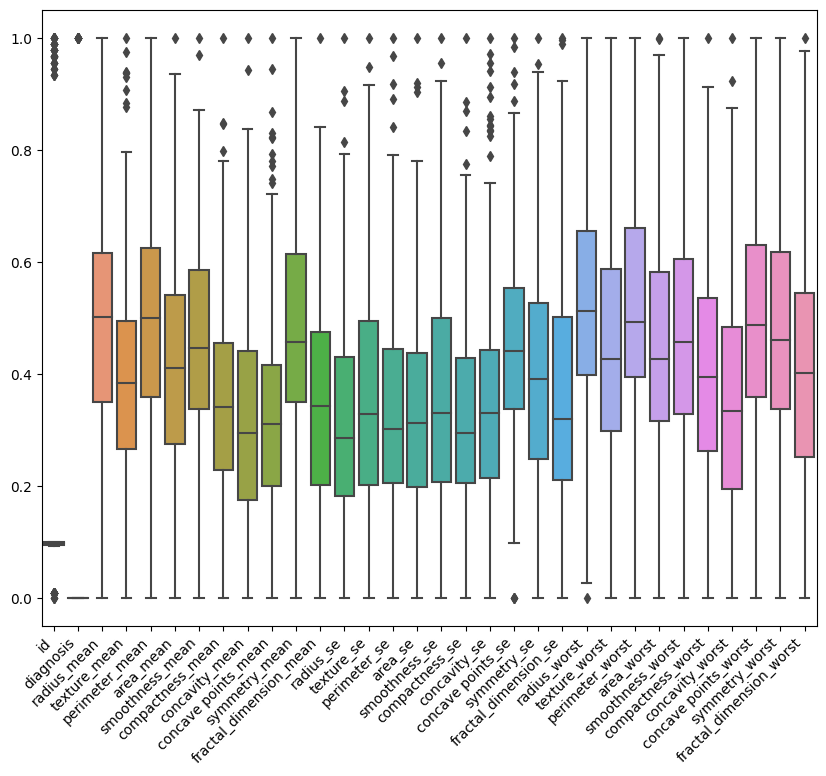

In [18]:
df_no_outlier_scaled_BP = pd.DataFrame(scaler.fit_transform(df_no_outlier), columns = df_no_outlier.columns)
plt.figure(figsize = (10,8))
sns.boxplot(data=df_no_outlier_scaled_BP)
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [ ]:
# For normalization, I have done normalization for my box plot earlier
# But for training the model, I need to scale it after separating it into X and y

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [ ]:
# The features are: Every column
# The output variable is 'diagnosis' and it's type is binary categorical data
# The type of modelling will be supervised model since we are dealing with labelled data and trying to predict some kind of value
# The type of supervised model is binary classification predicting whether X person donated blood or not

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [19]:
from sklearn.model_selection import train_test_split

# For number of observations, we know from .shape this data has 748 rows (observations) and 5 columns (features)
# Will now define the X and y for train test split as well

list_of_df = [df, df_no_outlier]

# Defining the y
y = df['diagnosis']
y_no_outlier = df_no_outlier['diagnosis']

# Defining the X
for df_iter in list_of_df:
    if 'diagnosis' in df_iter.columns:
        df_iter.drop(columns=['diagnosis'], inplace = True)

In [20]:
# Split your data

# Creating normalized X
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_no_outlier_scaled = pd.DataFrame(scaler.fit_transform(df_no_outlier), columns = df_no_outlier.columns)

# Add it to the list of data frame
list_of_df.append(df_scaled)
list_of_df.append(df_no_outlier_scaled)

In [21]:
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
df_scaled

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.001007,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.001008,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.001008,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [23]:
df_no_outlier

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
40,855167,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,...,15.93,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,923780,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,...,12.02,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
552,924084,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,0.1539,...,13.87,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
554,924632,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242
555,924934,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283


In [24]:
df_no_outlier_scaled

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.933733,0.598638,0.235801,0.612653,0.521275,0.576565,0.421960,0.559530,0.638915,0.654936,...,0.652824,0.279969,0.667420,0.584886,0.681695,0.422918,0.550564,0.823003,0.610429,0.319855
1,0.933758,0.542690,0.304260,0.578801,0.450663,0.735251,0.733506,0.383543,0.415609,0.735093,...,0.584729,0.327533,0.609138,0.480461,0.542640,0.719593,0.435384,0.465367,0.716258,0.528575
2,0.933777,0.107760,0.138438,0.110988,0.075339,0.651904,0.310387,0.248195,0.277429,0.586510,...,0.108060,0.140758,0.109299,0.072076,0.555676,0.238050,0.204262,0.397891,0.341002,0.435961
3,0.092920,0.536609,0.441684,0.522937,0.456459,0.446478,0.124591,0.215113,0.390619,0.246334,...,0.450770,0.417247,0.421376,0.370989,0.171211,0.035110,0.111334,0.320319,0.104294,0.073639
4,0.092945,0.586475,0.601927,0.588975,0.516242,0.312306,0.278967,0.261125,0.271415,0.556207,...,0.744363,0.704950,0.712625,0.684136,0.305812,0.502780,0.480304,0.710543,0.619121,0.294330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.100481,0.305522,0.645538,0.317240,0.234711,0.541755,0.426390,0.405038,0.301617,0.796676,...,0.307881,0.627997,0.313852,0.229555,0.298207,0.425580,0.360286,0.409776,0.708589,0.494466
229,0.100515,0.504987,1.000000,0.499630,0.432210,0.330936,0.156489,0.167674,0.200321,0.316716,...,0.514401,0.927301,0.480142,0.434136,0.457903,0.213204,0.199332,0.415208,0.319018,0.144793
230,0.100575,0.518365,0.974138,0.520903,0.441970,0.305932,0.264858,0.520151,0.313110,0.343109,...,0.516633,0.917247,0.492089,0.435430,0.450299,0.377662,0.561852,0.414888,0.301125,0.316015
231,0.100608,0.203357,0.907708,0.209582,0.147781,0.454159,0.389858,0.503694,0.365896,0.369501,...,0.176155,0.885151,0.180982,0.127329,0.620858,0.404283,0.460723,0.583195,0.226483,0.551163


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [26]:
y_no_outlier

19     0
20     0
21     0
37     0
40     1
      ..
551    0
552    0
554    0
555    0
560    0
Name: diagnosis, Length: 233, dtype: int64

In [27]:
# Splitting data now
# For defining the split and their proportions, I'll go with the standard 0.2 test and 0.8 train size

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
XS_train, XS_test, _, _ = train_test_split(df_scaled, y, test_size=0.2, random_state=42) 

X_NO_train, X_NO_test, y_NO_train, y_NO_test = train_test_split(df_no_outlier, y_no_outlier, test_size=0.2, random_state=42)
XS_NO_train, XS_NO_test, _, _ = train_test_split(df_no_outlier_scaled, y_no_outlier, test_size=0.2, random_state=42)

# It's a bit messy because I need to have each separate train/test data for comparing evaluation later
# Also the scaled version doesn't need it's own y train and test because it'll be the same as the non-scaled one
# The outlier/non-outlier does need it's own one because the row dimension is different for each

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [30]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [31]:
base_learners = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42, probability=True)),
    ('naive_bayes', GaussianNB())
]

meta_learner = LogisticRegression(random_state=42)

In [38]:
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [40]:
def evaluate_model(model_name, X_train, y_train, X_test, y_test):
    print(f"Evaluating model: {model_name}")
    
    stacking_clf.fit(X_train, y_train)
    
    y_pred_train = stacking_clf.predict(X_train)
    y_pred_test = stacking_clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    y_probs_train = stacking_clf.predict_proba(X_train)[:, 1]
    y_probs_test = stacking_clf.predict_proba(X_test)[:, 1]

    train_roc_auc = roc_auc_score(y_train, y_probs_train)
    test_roc_auc = roc_auc_score(y_test, y_probs_test)

    print(f'Training Accuracy: {train_accuracy:.3f}, ROC AUC: {train_roc_auc:.3f}')
    print(f'Test Accuracy: {test_accuracy:.3f}, ROC AUC: {test_roc_auc:.3f}')

    print('')

# Now evaluate each dataset version using both the training and test data
evaluate_model('Regular', X_train, y_train, X_test, y_test)
evaluate_model('Scaled', XS_train, y_train, XS_test, y_test)
evaluate_model('No Outliers', X_NO_train, y_NO_train, X_NO_test, y_NO_test)
evaluate_model('Scaled No Outliers', XS_NO_train, y_NO_train, XS_NO_test, y_NO_test)


Evaluating model: Regular
Training Accuracy: 1.000, ROC AUC: 1.000
Test Accuracy: 0.965, ROC AUC: 0.997

Evaluating model: Scaled
Training Accuracy: 0.993, ROC AUC: 1.000
Test Accuracy: 0.974, ROC AUC: 0.997

Evaluating model: No Outliers
Training Accuracy: 0.946, ROC AUC: 0.980
Test Accuracy: 0.915, ROC AUC: 0.872

Evaluating model: Scaled No Outliers
Training Accuracy: 0.984, ROC AUC: 0.989
Test Accuracy: 0.915, ROC AUC: 0.983



# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [41]:
# The problem listed on step 1 was to predict "diagnosis"
# From the above, we know that the best DataFrame is the Scaled one
# Test Accuracy: 0.974, ROC AUC: 0.997
# I will use that model and write a function which takes in parameters for predicting whether someone will donate or not
# This will fall into category as product/process

stacking_clf.fit(XS_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=LogisticRegression(random_state=42))

In [43]:
def predict_diagnosis(*args):
    # Check if the number of features provided matches the expected number
    if len(args) != 31:
        raise ValueError(f"Expected 31 features, got {len(args)}")
    
    # Convert to a DataFrame with column names
    feature_names = df.columns # Replace with your actual feature names
    features_df = pd.DataFrame([args], columns=feature_names)
    
    # Scale the features
    features_scaled = scaler.transform(features_df)
    
    # Predict with AdaBoostClassifier
    prediction = stacking_clf.predict(features_scaled)
    
    # Return a message based on the prediction
    if prediction == 1:
        return "It is Malignant"
    else:
        return "It is Benign"

# Example usage
predict_diagnosis(*X_test.iloc[1])

D:\Program\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


'It is Malignant'



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



